<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 5***
"Análisis de Series de Tiempo con Pandas" 

---

Durante esta actividad 5 de física computacional se pondrán en práctica las herramientas vistas en actividades pasadas para un análisis estadístico de datos de la estación meteorológica de 'La Paz', además de introducir nuevos conceptos como las líneas de tiempo. Estas líneas de tiempo simplemente son un conjunto de datos ordenados de manera cronológica en intervalos iguales.
 
Se analizarán estas series de tiempo de manera estadística buscando obtener información de interés como lo pudiera llegar a ser el promedio aritmético, desviación estándar, patrones, regularidades, promedios móviles, entre otras.
Se buscará al igual que en la actividad pasada, la adecuada graficación de estas líneas de tiempo y los datos de interés reflejados en estas por lo que de manera general en esta actividad se pide una completa dominación de las líneas de tiempo y proyección de gráficas que muestren información estadística de interés.


In [3]:
#Aqui introducimos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm
#Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

#------------------------------------------------RETOMAMOS NUESTRO DATAFRAME DE LA ACTIVIDAD PASADA-------------------------------------------------------------------------------------

#Definimos como la direccion url donde se ubica nuestro archivo
url="https://raw.githubusercontent.com/GerardoxCarreon/FisicaComputacional1/master/Actividad3/Copia%20de%20Climatologia%20diaria_La%20Paz.txt"

#Definimos manualmente los nombres para nuestras columnas mediante la función my_cols
my_cols=[ 'Fecha' , 'Precip' , 'Evap' , 'Tempmax' , 'Tempmin' ]
#Definimos nuestro archivo como un csv con parametros para poder leerlo como Dataframe 
df_clim = pd.read_csv(url, names=my_cols, encoding='cp1252', sep='\s+', header=None, skiprows=19, skipfooter=1, skip_blank_lines=True, engine='python')

#Realizamos una copia del primer DataFrame 
df_cop=df_clim.copy()

#Sustituimos los valores marcados como Nulo en el DataFrame por espacios en blanco
#Para esto deberemos sustituir la copia del primer DataFrame por otra copia
str_Nulo = 'Nulo'
df_cop2 = df_cop.replace(to_replace=str_Nulo, value='', regex=True)

#Ahora convertiremos todos los valores numericos que el DataFrame almaceno como objetos a numeros flotantes
#Los datos que se convertiran en numeros flotantes seran los que se encuentran en las columnas de Precipitacion, Evaporacion, Tempmax y Tempmin
cols_list=['Precip', 'Evap', 'Tempmax', 'Tempmin']
for cols in cols_list:
  df_cop2[cols]=pd.to_numeric(df_cop2[cols], errors='coerce')

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop3=df_cop2.copy()

#Ahora convertiremos la informacion almacenada en la columna de Fecha del DataFrame de objeto a formato datetime
#Utilizamos la función pd.to_datetime que convierte la fecha en datetime 
#Definimos que la fecha este ordenada por dia, mes, año
df_cop3['Fecha']=pd.to_datetime(df_cop3['Fecha'], dayfirst=True).copy()

#Creamos dos nuevas columnas para el DataFrame las cuales contendran el Mes y Año de los datos, para esto extraeremos estos valores de la recien creada columna de Fecha
#Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_cop3['Año'] = df_cop3['Fecha'].dt.year
df_cop3['Mes'] = df_cop3['Fecha'].dt.strftime('%b')

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop4=df_cop3.copy()

#En este paso, convertiremos la columna de Mes de variable numerica a variable categorica con la función .dt.strftime('%b'), esto con la finalidad de poder utilizar estas variables como etiquetas en una posible gráfica de datos
df_cop4.drop('Mes', axis=1, inplace=True)
df_cop4['Mes'] = df_cop3['Fecha'].dt.strftime('%b')

#Imprimimos la informacion, descripcion estadistica, primeros y ultimos cinco renglones del DataFrame
print('INFORMACION DE DATAFRAME\n')
df_cop4.info()
print('')
print('ENCABEZADO DE DATAFRAME\n')
print(df_cop4.head())
print('')
print('PIE DE DATAFRAME\n')
print(df_cop4.tail())
print('')
print('DESCRPCION DE DATAFRAME\n')
df_cop4.describe().round(2)

#------------------------------------------------------FIN DE NUESTRO DATAFRAME DE LA ACTIVIDAD PASADA-------------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


INFORMACION DE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18661 entries, 0 to 18660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    18661 non-null  datetime64[ns]
 1   Precip   18659 non-null  float64       
 2   Evap     1238 non-null   float64       
 3   Tempmax  18658 non-null  float64       
 4   Tempmin  18657 non-null  float64       
 5   Año      18661 non-null  int64         
 6   Mes      18661 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1020.6+ KB

ENCABEZADO DE DATAFRAME

       Fecha  Precip  Evap  Tempmax  Tempmin   Año  Mes
0 1961-04-18     0.0   NaN     33.0      NaN  1961  Apr
1 1961-04-19     0.0   NaN     31.0     12.5  1961  Apr
2 1961-04-20     0.0   NaN     31.0     12.0  1961  Apr
3 1961-04-21     0.0   NaN     33.0     16.0  1961  Apr
4 1961-04-22     0.0   NaN     36.0     16.0  1961  Apr

PIE DE DATAFRA

,Precip,Evap,Tempmax,Tempmin,Año
count,18659.00,1238.00,18658.00,18657.00,18661.00
mean,1.12,4.22,29.85,13.81,1989.11
std,7.37,1.60,4.89,4.76,17.01
min,0.00,0.80,13.00,-4.00,1961.00
25%,0.00,2.90,26.00,10.00,1974.00
50%,0.00,4.00,30.00,13.00,1987.00
75%,0.00,5.20,34.00,18.00,2005.00
max,259.00,11.00,42.00,28.00,2017.00


In [6]:
#Nuevamente realizamos una copia del ultimo DataFrame
df_cop5_ts=df_cop4.copy()
#Hacemos que la variable 'Fecha' sea el nuevo indice de nuestro DataFrame
df_cop5_ts=df_cop5_ts.set_index('Fecha')
#Comprobamos que se haya cambiado el indice
print('INFORMACION DE DATAFRAME\n')
df_cop5_ts.info()
print('')
print('ENCABEZADO DE DATAFRAME\n')
print(df_cop5_ts.head())
print('')
print('PIE DE DATAFRAME\n')
print(df_cop5_ts.tail())

INFORMACION DE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18661 entries, 1961-04-18 to 2017-12-31
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Precip   18659 non-null  float64
 1   Evap     1238 non-null   float64
 2   Tempmax  18658 non-null  float64
 3   Tempmin  18657 non-null  float64
 4   Año      18661 non-null  int64  
 5   Mes      18661 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1020.5+ KB

ENCABEZADO DE DATAFRAME

            Precip  Evap  Tempmax  Tempmin   Año  Mes
Fecha                                                
1961-04-18     0.0   NaN     33.0      NaN  1961  Apr
1961-04-19     0.0   NaN     31.0     12.5  1961  Apr
1961-04-20     0.0   NaN     31.0     12.0  1961  Apr
1961-04-21     0.0   NaN     33.0     16.0  1961  Apr
1961-04-22     0.0   NaN     36.0     16.0  1961  Apr

PIE DE DATAFRAME

            Precip  Evap  Tempmax  Tempmin   Año  Mes
Fec

In [7]:
#Tomaremos un conjunto de datos de los ultimos 30 años  
df_30=df_cop5_ts[(df_cop5_ts['Año']>= 1987) & (df_cop5_ts['Año'] < 2017)]
#Imprimimos el encabezado de nuestro DataFrame de los ultimos 30 años
df_30.head()

,Precip,Evap,Tempmax,Tempmin,Año,Mes
Fecha,,,,,,
1987-01-01,0.0,NaN,29.0,6.0,1987,Jan
1987-01-02,0.0,NaN,24.0,6.0,1987,Jan
1987-01-03,0.0,NaN,23.0,4.0,1987,Jan
1987-01-04,0.0,NaN,23.0,5.0,1987,Jan
1987-01-05,0.0,NaN,22.0,7.0,1987,Jan


In [8]:
#Imprimimos el pie de nuestro DataFrame de los ultimos 30 años
df_30.tail()

,Precip,Evap,Tempmax,Tempmin,Año,Mes
Fecha,,,,,,
2016-12-27,0.0,NaN,23.0,14.0,2016,Dec
2016-12-28,0.0,NaN,31.0,11.0,2016,Dec
2016-12-29,0.0,NaN,30.0,13.0,2016,Dec
2016-12-30,0.0,NaN,25.0,16.0,2016,Dec
2016-12-31,0.0,NaN,31.0,15.0,2016,Dec


Inventario de Datos 1987-2016, La Paz BCS


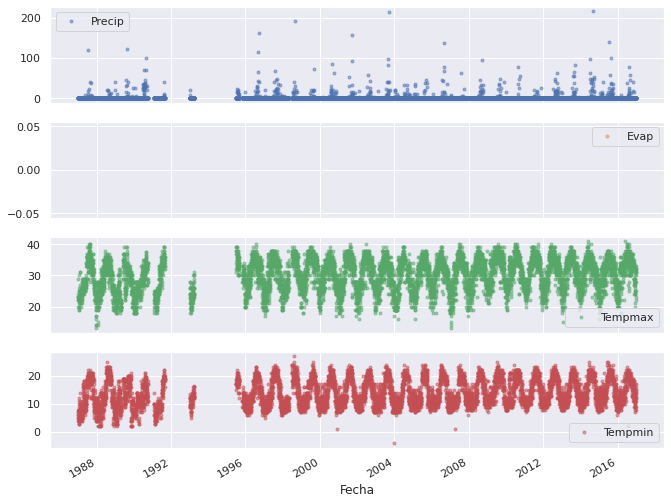

In [9]:
#Gráficamos los datos de las columnas de nuestro DataFrame para observar si hay datos faltantes o 'nulos' 
print('Inventario de Datos 1987-2016, La Paz BCS')
cols_plot=['Precip','Evap','Tempmax','Tempmin']
ax_ylabels=['Precip(mm)','Evap(mm)','Tempmax °C','Tempmin °C']
axes=df_30[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9), subplots=True)

In [ ]:
#Podemos observar que hay datos faltantes entre los años de 1992 a 1996

*   # ***Actividad 1.*** 
Explora tus datos de Precipitación de los últimos años 1990- fin de datos.



Precipitación promedio 1990-2017 : 1.239973343026778


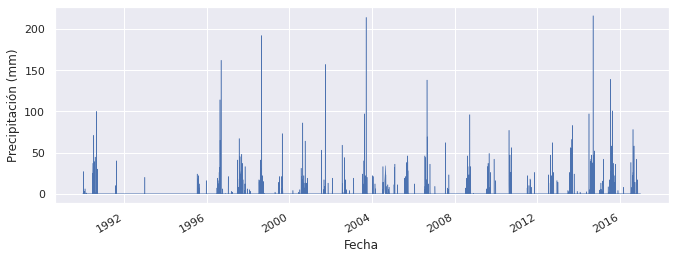

In [10]:
#Graficamos la Precipitación del ultimo rango de datos
sns.set(rc={'figure.figsize':(11, 4)})
#Tomaremos un conjunto de datos de los años 90 hasta la actualidad  
df_90=df_cop5_ts[(df_cop5_ts['Año']>= 1990) & (df_cop5_ts['Año'] < 2017)]
#Calculamos los promedios de precipitacion para el conjunto de datos de 1990-2017
Precip_ave_90 = df_90.Precip.mean()
#Graficamos la precipitación de la epoca 90 a la actualidad
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
#Imprimimos los promedios de precipitación
print('Precipitación promedio 1990-2017 :', Precip_ave_90)

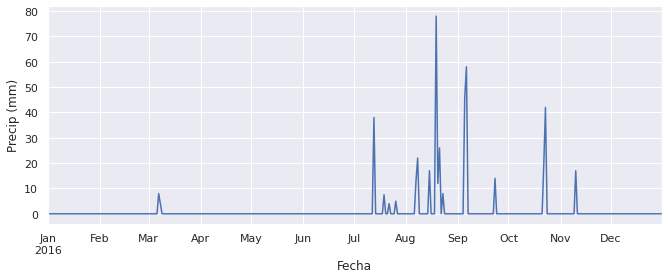

In [11]:
#Analizaremos un año específico completo (2016), utilizando la función df.loc() para seleccionar el rango de datos
ax=df_90.loc['2016', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

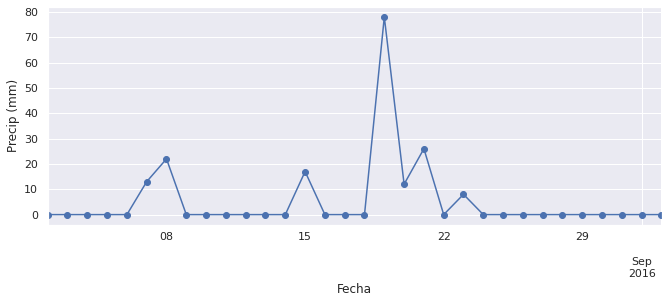

In [12]:
#Analizaremos un año específico completo (2016), utilizando la función df.loc() para seleccionar el rango de datos
#Del 2016 tomaremos el intervalo de meses de Aug a Sep
ax=df_90.loc['2016-08-02':'2016-09-02', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

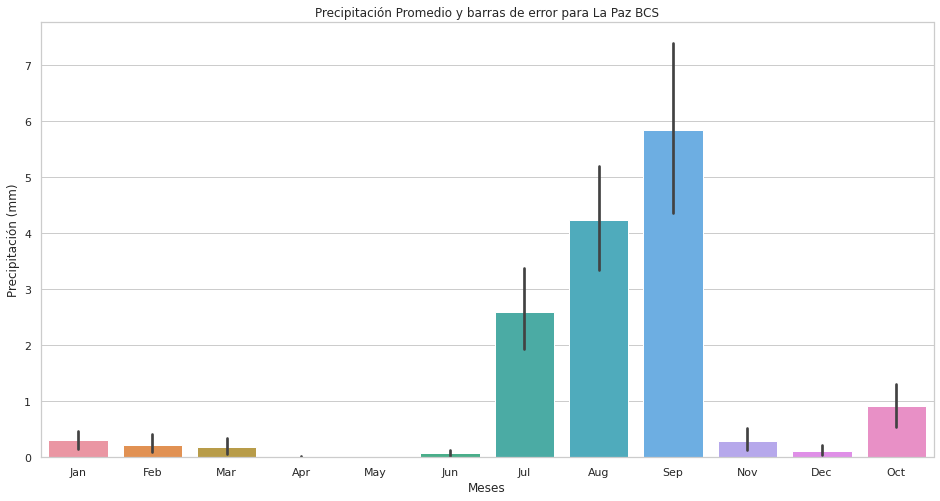

In [13]:
#Gráfica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 
#Gráfica de Precipitación 1990-2017 agrupada por mes
sns.set_style('whitegrid')
#Dimensiones de la gráfica
plt.figure(figsize=(16,8))
#Graficamos los datos usando la columna 'Mes' en el eje x
g=sns.barplot(x='Mes', y='Precip', data=df_90);
#Nombres de los ejes y etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para La Paz BCS')
plt.show()

*   # ***Actividad 2.*** 
Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990, trata de construir dos subgráficas contiguas.



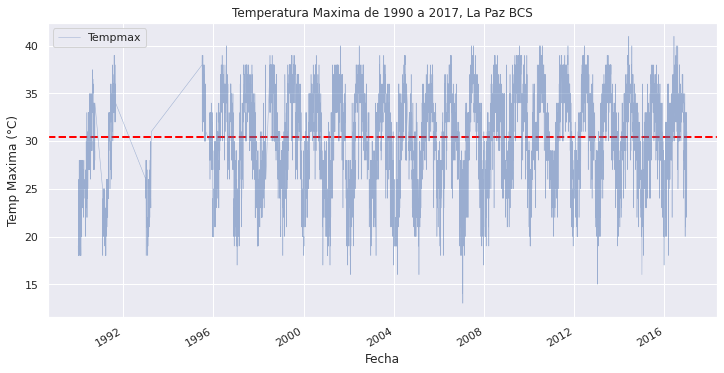

In [14]:
#Gráficamos la Temperatura maxima de los ultimos 30 años a partir de 1990
#Dimensiones de la grafica
sns.set(rc={'figure.figsize':(12,6)})
#Calculamos el promedio de la temperatura máxima
Tempmax_ave_90= df_90.Tempmax.mean()
#Líneas horizontales ubicadas en el promedio
plt.axhline(Tempmax_ave_90, color='red',linestyle='--',linewidth=2);
#Graficamos la temperatura máxima
df_90['Tempmax'].plot(linewidth=0.5,alpha=0.5);
plt.ylabel('Temp Maxima (°C)');
plt.title('Temperatura Maxima de 1990 a 2017, La Paz BCS')
plt.legend();

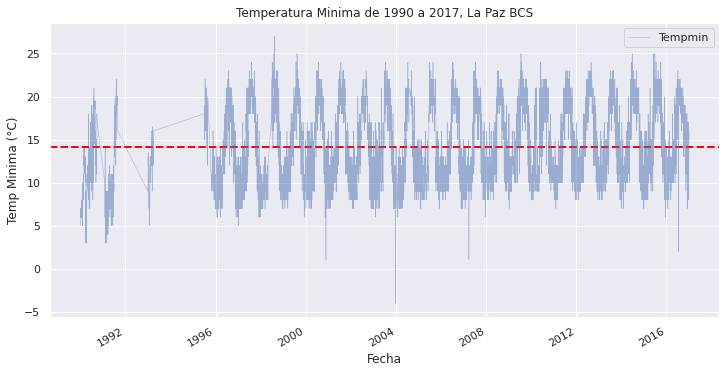

In [15]:
#Gráficamos la Temperatura minima de los ultimos 30 años a partir de 1990
#Dimensiones de la grafica
sns.set(rc={'figure.figsize':(12,6)})
#Calculamos el promedio de la temperatura máxima
Tempmin_ave_90= df_90.Tempmin.mean()
#Líneas horizontales ubicadas en el promedio
plt.axhline(Tempmin_ave_90, color='red',linestyle='--',linewidth=2);
#Graficamos la temperatura minima
df_90['Tempmin'].plot(linewidth=0.5,alpha=0.5);
plt.ylabel('Temp Minima (°C)');
plt.title('Temperatura Minima de 1990 a 2017, La Paz BCS')
plt.legend();

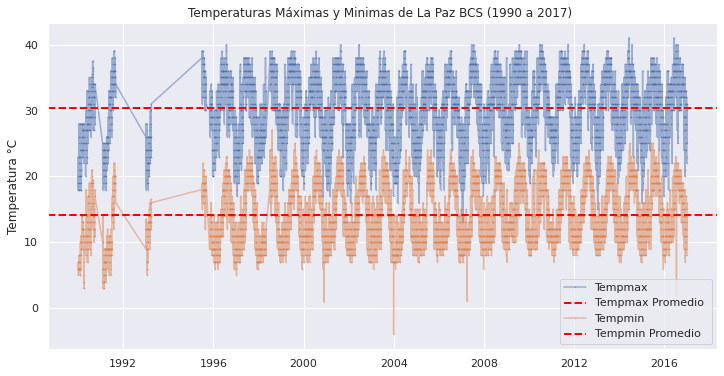

In [16]:
#Subgraficas contiguas de temperaturas maximas y minimas de 1990-2017
star,end='1990-01','2017-12'
fig,ax= plt.subplots()
for nm in ['Tempmax','Tempmin']:
  ax.plot(df_90[nm],marker='.',markersize=1,linestyle='-', alpha=0.5,label=nm)
  plt.axhline(df_90.loc[star:end,nm].mean(),color='red', linestyle='--', linewidth=2,label=nm +' Promedio ');
  ax.legend()
  ax.set_ylabel('Temperatura °C')
  ax.set_title('Temperaturas Máximas y Minimas de La Paz BCS (1990 a 2017) ');

Text(0.5, 1.0, 'Temperaturas Maxima y Minima de La Paz BCS (2004)')

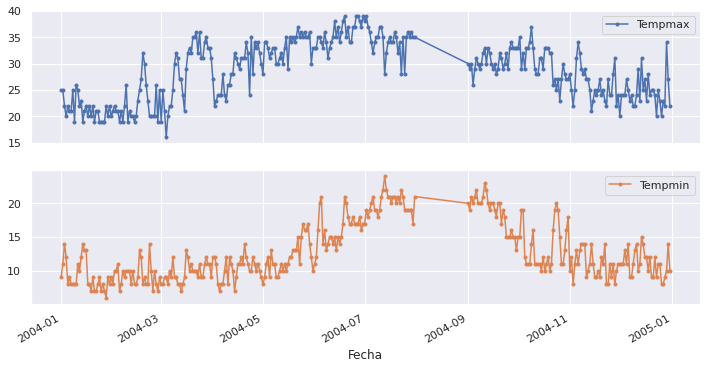

In [17]:
#Anaizaremos un año especifico completo (2004), de las temperaturas maximas y minimas de ese año
cols_plot =['Tempmax','Tempmin']
ax_ylabels =['Tmax °C','Tmin °C']
axes =df_90.loc['2004',cols_plot].plot(marker='.',linestyle='-',subplots=True)
#Etiqueta de titulo y ejes
ax.legend()
ax.set_ylabel('Temperatura °C')
ax.set_title('Temperaturas Maxima y Minima de La Paz BCS (2004)')

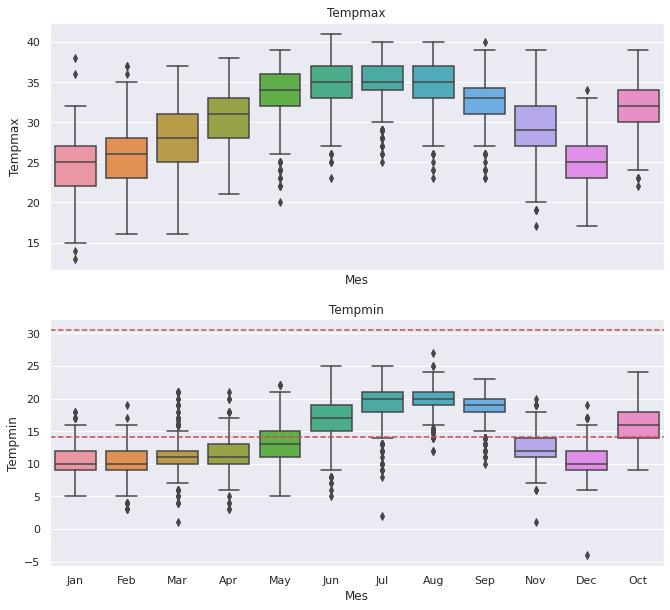

In [18]:
#Gráfica la estacionalidad de tus datos por mes utilizando la función sns.boxplot() 
#Gráfica de Temperaturas Máxima y Minima 1990-2017 agrupada por mes
#Dimensiones de la gráfica
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Tempmax', 'Tempmin'], axes):
  #Graficamos los datos usando la columna 'Mes' en el eje x
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  plt.axhline(df_90[name].mean(),linestyle='--',color='r')
  ax.set_title(name)

*   # ***Actividad 3.*** 
Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.


*   # ***Actividad 4.*** 
Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:

In [20]:
#Creamos los DataFrames de 7,30 y 365 dias para los años de 1990-2017 esto para las varibles Evaporación, Temperatura Máxima y Minima para suavizar la curva de Temperatura Máxima
data_cols = ['Evap','Tempmax','Tempmin']
df_90_7d=df_90[data_cols].rolling(7,center=True,min_periods=1).mean()
df_90_30d=df_90[data_cols].rolling(30, center=True,min_periods=1).mean()
df_90_365d=df_90[data_cols].rolling(365,center=True,min_periods=1).mean()

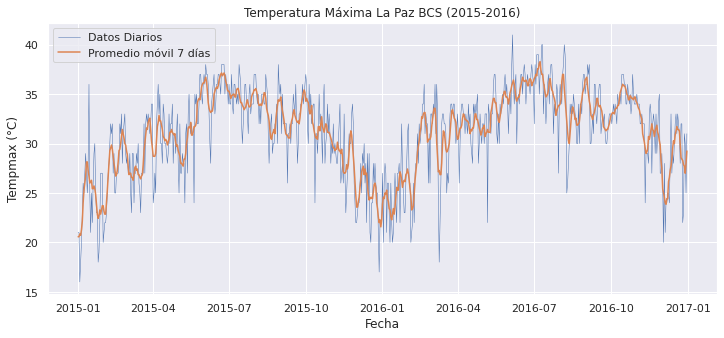

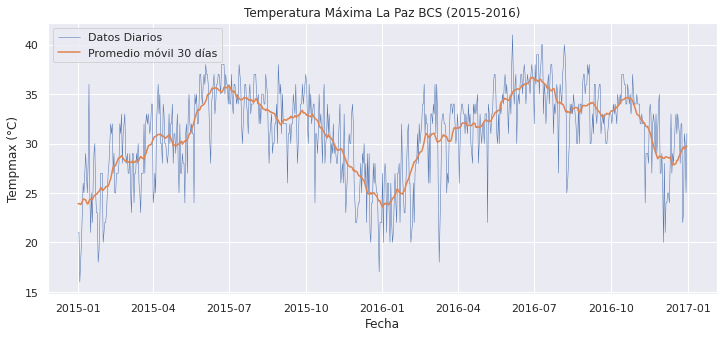

In [30]:
#Promedio movil Temperatura Máxima para 7 y 30 dias para un año de datos
#Intervalo de tiempo
start, end = '2015-01', '2016-12'
#Gráfica de datos diarios
sns.set(rc={'figure.figsize':(12, 5)})
#Contraste de la gráfica de datos diarios con la de promedio movil para 7 y 30 dias
for name, ax ,d in zip([df_90_7d, df_90_30d], axes, [7,30]):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, 'Tempmax'], linestyle='-', linewidth=0.5, label='Datos Diarios')
  ax.plot(name.loc[start:end, 'Tempmax'], linestyle='-', label=f'Promedio móvil {d} días')
  #Etiqueta de titulo y ejes
  ax.set_xlabel('Fecha')
  ax.set_ylabel('Tempmax (°C)')
  ax.set_title('Temperatura Máxima La Paz BCS (2015-2016)')
  ax.legend();

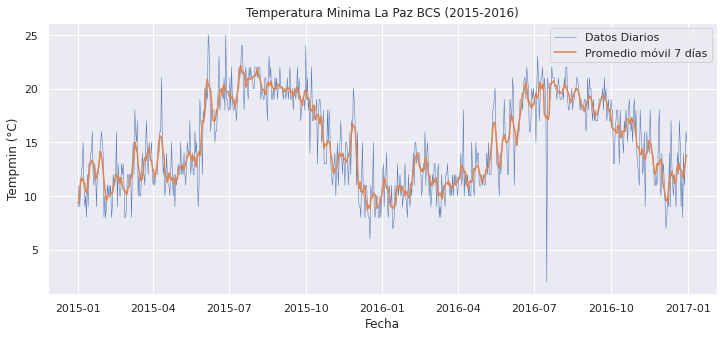

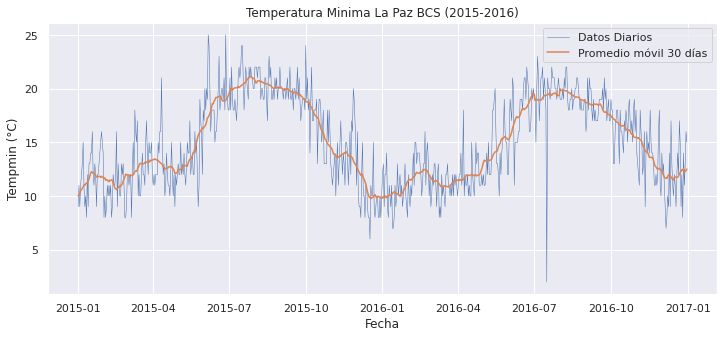

In [31]:
#Promedio movil Temperatura Minima para 7 y 30 dias para un año de datos
#Intervalo de tiempo
start, end = '2015-01', '2016-12'
#Gráfica de datos diarios
sns.set(rc={'figure.figsize':(12, 5)})
#Contraste de la gráfica de datos diarios con la de promedio movil para 7 y 30 dias
for name, ax ,d in zip([df_90_7d, df_90_30d], axes, [7,30]):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, 'Tempmin'], linestyle='-', linewidth=0.5, label='Datos Diarios')
  ax.plot(name.loc[start:end, 'Tempmin'], linestyle='-', label=f'Promedio móvil {d} días')
  #Etiqueta de titulo y ejes
  ax.set_xlabel('Fecha')
  ax.set_ylabel('Tempmin (°C)')
  ax.set_title('Temperatura Minima La Paz BCS (2015-2016)')
  ax.legend();

In [35]:
#Datos Nulos de Evaporación en los ultimos 30 años desde 1990

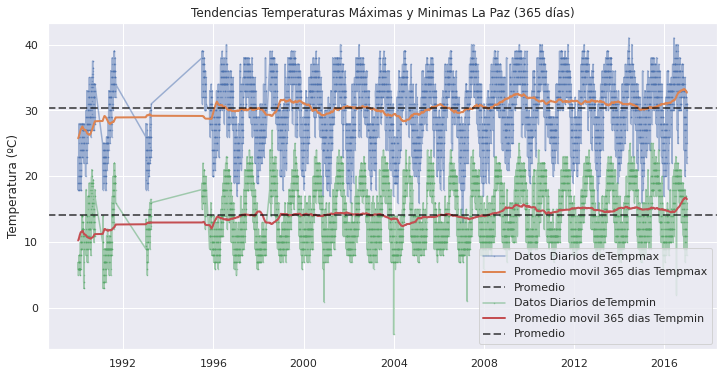

In [38]:
#Promedios móviles Temperaturas Máximas y Minimas para 365 días 
#Gráfica de datos diarios
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo
start, end = '1990-01', '2016-12'
#Contraste de la gráfica de datos diarios con la de promedio movil para 365 dias
fig, ax = plt.subplots()
for nm in ['Tempmax', 'Tempmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios de'+nm)
    
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label='Promedio movil 365 dias '+nm)
    #ax.plot(df_00_7d.loc[star:end,nm],linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color ='black', linestyle='--', linewidth=2,label='Promedio',alpha=0.6);
     #Etiqueta de titulo y ejes
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias Temperaturas Máximas y Minimas La Paz (365 días)');

*   # ***Actividad 5.*** 
Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.
Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

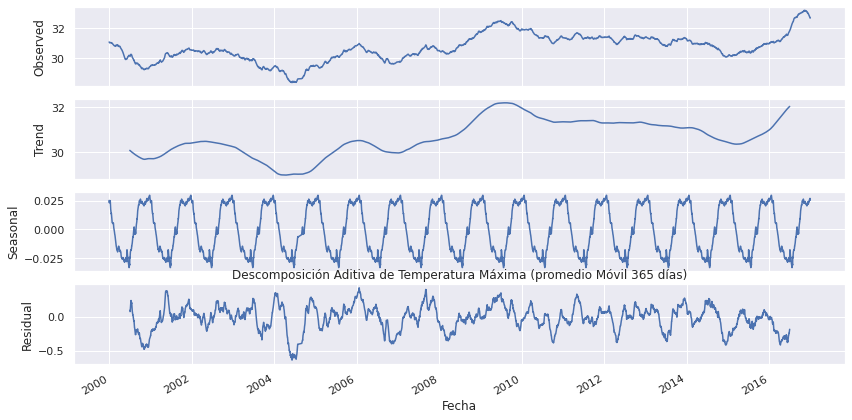

In [40]:
#Usando Modelo Stats Model para promedio movil de 365 dias Temperatura Máxima
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo de datos completos 
start, end = '2000-01', '2016-12'
#Descomposción de los años en 365 días
decompfreq = 365
resTempmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tempmax'].interpolate(), freq=decompfreq, model='additive')
resTempmax.plot()
#etiqueta de titulo
plt.title('Descomposición Aditiva de Temperatura Máxima (promedio Móvil 365 días)');

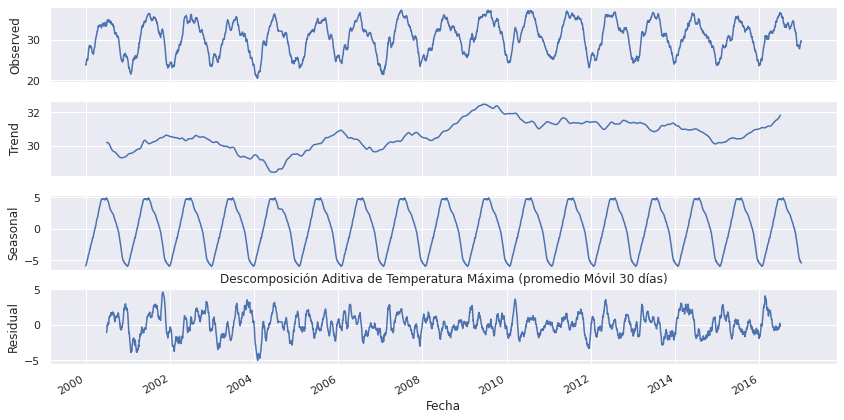

In [41]:
#Usando Modelo Stats Model para promedio movil de 30 dias Temperatura Máxima
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo de datos completos 
start, end = '2000-01', '2016-12'
#Descomposción de los años en 30 días
decompfreq = 365
resTempmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tempmax'].interpolate(), freq=decompfreq, model='additive')
resTempmax.plot()
#etiqueta de titulo
plt.title('Descomposición Aditiva de Temperatura Máxima (promedio Móvil 30 días)');

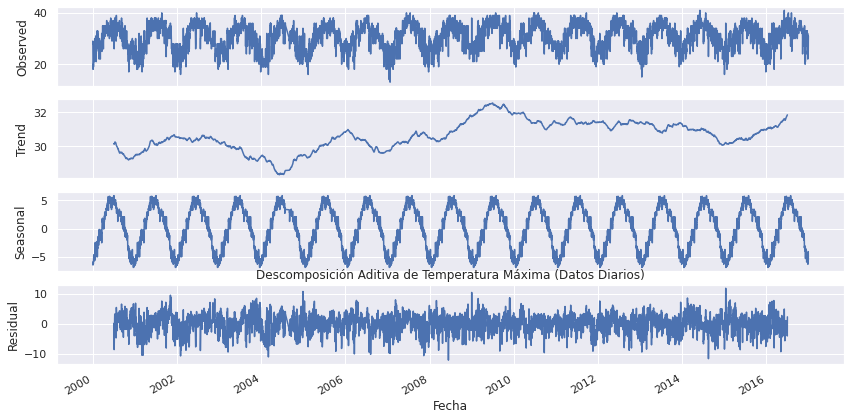

In [43]:
#Usando Modelo Stats Model para datos diarios Temperatura Máxima
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo de datos completos 
start, end = '2000-01', '2016-12'
#Descomposción de los años en 365 días
decompfreq = 365
resTempmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tempmax'].interpolate(), freq=decompfreq, model='additive')
resTempmax.plot()
#etiqueta de titulo
plt.title('Descomposición Aditiva de Temperatura Máxima (Datos Diarios)');

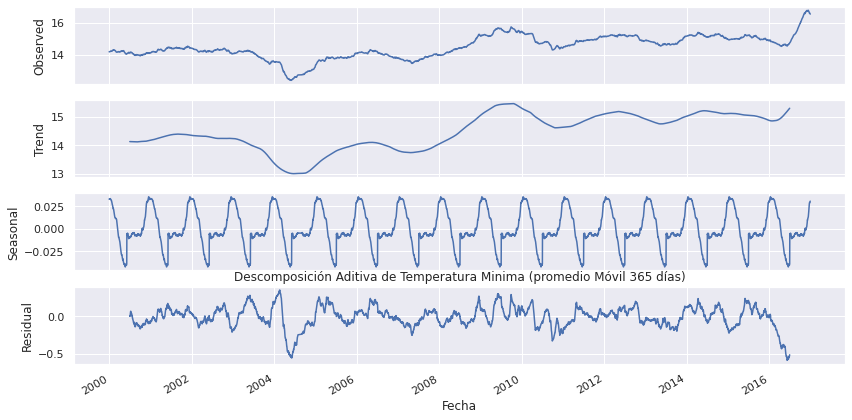

In [44]:
#Usando Modelo Stats Model para promedio movil de 365 dias Temperatura Minima
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo de datos completos 
start, end = '2000-01', '2016-12'
#Descomposción de los años en 365 días
decompfreq = 365
resTempmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tempmin'].interpolate(), freq=decompfreq, model='additive')
resTempmin.plot()
#etiqueta de titulo
plt.title('Descomposición Aditiva de Temperatura Minima (promedio Móvil 365 días)');

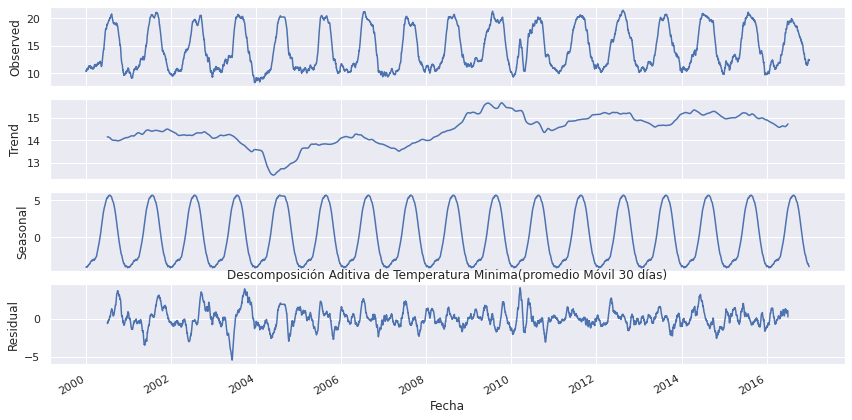

In [45]:
#Usando Modelo Stats Model para promedio movil de 30 dias Temperatura Minima
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo de datos completos 
start, end = '2000-01', '2016-12'
#Descomposción de los años en 30 días
decompfreq = 365
resTempmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tempmin'].interpolate(), freq=decompfreq, model='additive')
resTempmin.plot()
#etiqueta de titulo
plt.title('Descomposición Aditiva de Temperatura Minima(promedio Móvil 30 días)');

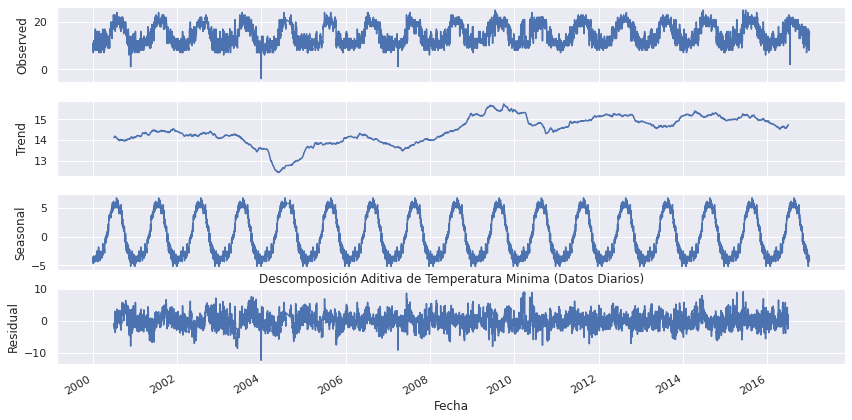

In [46]:
#Usando Modelo Stats Model para datos diarios Temperatura Minima
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
#Intervalo de tiempo de datos completos 
start, end = '2000-01', '2016-12'
#Descomposción de los años en 365 días
decompfreq = 365
resTempmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tempmin'].interpolate(), freq=decompfreq, model='additive')
resTempmin.plot()
#etiqueta de titulo
plt.title('Descomposición Aditiva de Temperatura Minima (Datos Diarios)');

In [48]:
#Imprimimos los resultados obtenidos
print("resTempmax")
print()
print(resTempmax.trend.describe())
print()
print("resTempmin")
print()
print(resTempmin.trend.describe())

resTempmax

count    5814.000000
mean       30.641225
std         0.840022
min        28.350685
25%        30.142466
50%        30.603973
75%        31.301370
max        32.531507
Name: Tempmax, dtype: float64

resTempmin

count    5814.000000
mean       14.463977
std         0.656094
min        12.421918
25%        14.041096
50%        14.446575
75%        15.010959
max        15.739726
Name: Tempmin, dtype: float64


*   # ***Actividad 6.*** 
Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.   

In [50]:
#Creamos dos periodos de 30 años contiguos para el analisis en la distribución de temperaturas
df_p1=df_cop5_ts[(df_cop5_ts['Año']>=1961)&(df_cop5_ts['Año']>1991)]
df_p2 = df_cop5_ts[(df_cop5_ts['Año']>=1991)&(df_cop5_ts['Año']<2017)]

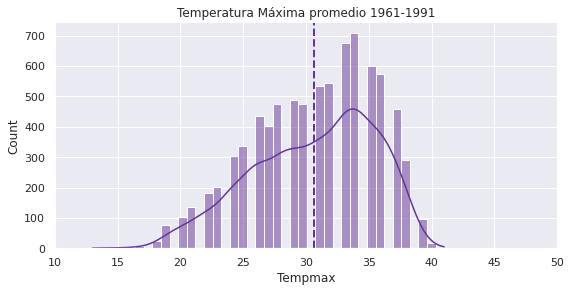

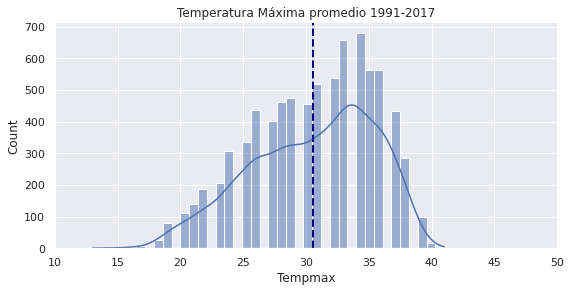

Temperatura Máxima promedio (1961-1991) =  30.622856091277143 ºC
Temperatura Máxima promedio (1991-2017) =  30.5246125 ºC


In [52]:
#Gráfica de distribución Temperatura Máxima
#Distribucion de 1961-1991
g2=sns.displot(df_p1.Tempmax, kde=True, color='rebeccapurple', height=4, aspect=2);
plt.axvline(df_p1.Tempmax.mean(), linestyle='--', linewidth=2, color='rebeccapurple');
#Distribución de 1991-2017
g3=sns.displot(df_p2.Tempmax, kde=True, height=4, aspect=2);
plt.axvline(df_p2.Tempmax.mean(), linestyle='--', linewidth=2, color='navy');
#Etiquetas de titulo y ejes
g2.set(title='Temperatura Máxima promedio 1961-1991');
g3.set(title='Temperatura Máxima promedio 1991-2017');
#Limites de la gráfica
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))
plt.show();
#Imprimir temperaturas maximas promedio
print('Temperatura Máxima promedio (1961-1991) = ', df_p1.Tempmax.mean(), 'ºC' )
print('Temperatura Máxima promedio (1991-2017) = ', df_p2.Tempmax.mean(), 'ºC' )

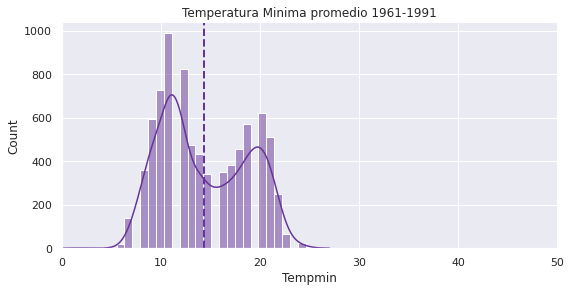

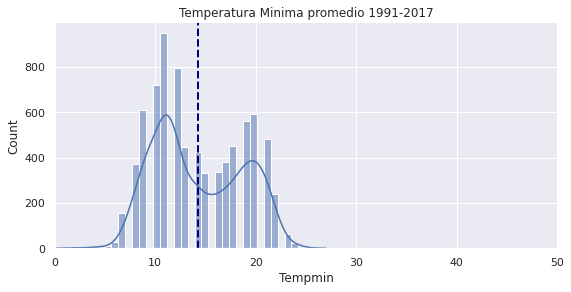

Temperatura Minima promedio (1961-1991) =  14.351073487915594 ºC
Temperatura Minima promedio (1991-2017) =  14.233450000000001 ºC


In [54]:
#Gráfica de distribución Temperatura Minima
#Distribucion de 1961-1991
g2=sns.displot(df_p1.Tempmin, kde=True, color='rebeccapurple', height=4, aspect=2);
plt.axvline(df_p1.Tempmin.mean(), linestyle='--', linewidth=2, color='rebeccapurple');
#Distribución de 1991-2017
g3=sns.displot(df_p2.Tempmin, kde=True, height=4, aspect=2);
plt.axvline(df_p2.Tempmin.mean(), linestyle='--', linewidth=2, color='navy');
#Etiquetas de titulo y ejes
g2.set(title='Temperatura Minima promedio 1961-1991');
g3.set(title='Temperatura Minima promedio 1991-2017');
#Limites de la gráfica
g2.set(xlim=(0,50))
g3.set(xlim=(0,50))
plt.show();
#Imprimir temperaturas maximas promedio
print('Temperatura Minima promedio (1961-1991) = ', df_p1.Tempmin.mean(), 'ºC' )
print('Temperatura Minima promedio (1991-2017) = ', df_p2.Tempmin.mean(), 'ºC' )